# Tutorial - Gender Bias in Words Embedding
Based on:
Bolukbasi Tolga, Kai-Wei Chang, James Y. Zou, Venkatesh Saligrama, and Adam T. Kalai. [Man is to computer programmer as woman is to homemaker? debiasing word embeddings](https://arxiv.org/abs/1607.06520). NIPS 2016.

## Imports

In [1]:
from gensim import downloader
from gensim.models import KeyedVectors

from ethically.we import GenderBiasWE

## Google's Word2Vec

### Download and load word2vec full model (might take few minutes)

In [2]:
w2v_path = downloader.load('word2vec-google-news-300', return_path=True)
print(w2v_path)
w2v_model = KeyedVectors.load_word2vec_format(w2v_path, binary=True)

/home/users/shlohod/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


### Create Gender Bias Words Embedding

In [3]:
w2v_gender_bias_we = GenderBiasWE(w2v_model, only_lower=False, verbose=True)

Identify direction using pca method...
  Principal Component    Explained Variance Ratio
---------------------  --------------------------
                    1                  0.605292
                    2                  0.127255
                    3                  0.099281
                    4                  0.0483466
                    5                  0.0406355
                    6                  0.0252729
                    7                  0.0232224
                    8                  0.0123879
                    9                  0.00996098
                   10                  0.00834613


### Evaluate the Words Embedding on (1) words pair and (2) analogies tasks


In [4]:
w2v_gender_bias_we.evaluate_words_embedding()

Evaluate word pairs...
Evaluate analogies...

From Gensim

------------------------------

Word Pairs Result - WordSimilarity-353:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Pearson correlation coefficient: (0.6238773444802619, 1.7963251834702263e-39)
Spearman rank-order correlation coefficientbetween the similarities from the datasetand the similarities produced by the model itself: SpearmanrResult(correlation=0.6589215888009288, pvalue=2.5346056459149263e-45)
Ratio of pairs with unknown words: 0.0

------------------------------

Analogies Result
~~~~~~~~~~~~~~~~
Overall evaluation score: 0.7401448525607863


### Calculate direct gender bias (section 5.2 in the article)

In [5]:
w2v_gender_bias_we.calc_direct_bias()

0.07307904249481942

### Plot the projection of different professions on the gender direction

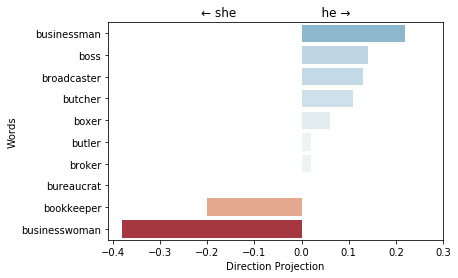

In [6]:
# _.data API will change in the future
sample_profession_name = w2v_gender_bias_we._data['profession_names'][40:50]
w2v_gender_bias_we.plot_projection_scores(sample_profession_name);

### Plot the distribution of projections of the word groups that are being used for the auditing and adjusting the model

1. **profession_name** - List of profession names, neutral and gender spcific.
2. **neutral_profession_name** - List of only neutral profession names.
3. **specific_seed** - Seed list of gender specific words.
4. **specific_full** - List of the learned specifc gender over all the vocabulary.
5. **specific_full_with_definitional** -  **specific_full** with the words that were used to define the gender direction.
6. **neutral_words** - List of all the words in the vocabulary that are not part of **specific_full_with_definitional**.

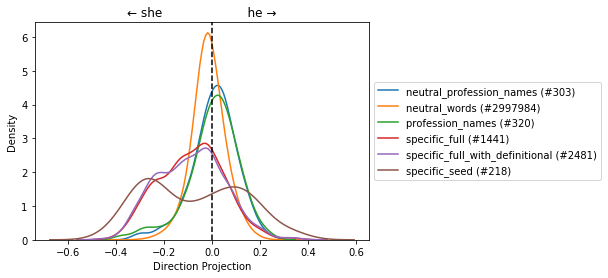

In [7]:
w2v_gender_bias_we.plot_dist_projections_on_direction()

### Preform hard-debiasing (section 6 in the article)

In [8]:
w2v_gender_bias_we.debias('hard')

Neutralize...


100%|██████████| 2997984/2997984 [02:22<00:00, 21025.63it/s]


Equalize...


## Now our model is gender debiased, let's check what changed...

### Evaluate the debaised model


In [9]:
w2v_gender_bias_we.evaluate_words_embedding()

Evaluate word pairs...
Evaluate analogies...

From Gensim

------------------------------

Word Pairs Result - WordSimilarity-353:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Pearson correlation coefficient: (0.6229075431672366, 2.5455943669404915e-39)
Spearman rank-order correlation coefficientbetween the similarities from the datasetand the similarities produced by the model itself: SpearmanrResult(correlation=0.6571345149468917, pvalue=5.26293047396376e-45)
Ratio of pairs with unknown words: 0.0

------------------------------

Analogies Result
~~~~~~~~~~~~~~~~
Overall evaluation score: 0.7372995344024832


The evaluation of the words embedding did not change so much because of the debiasing:

| Debias | Words Pairs | Analogies |
|--------|-------------|-----------|
| Before | 0.6238      | 0.7401    |
| After  | 0.6229      | 0.7372    |

### Calculate direct gender bias (section 5.2 in the article)

In [10]:
w2v_gender_bias_we.calc_direct_bias()

1.7964246601064155e-09

The words embedding is not biased any more (in the professions sense).

### Plot the projection of different professions on the gender direction

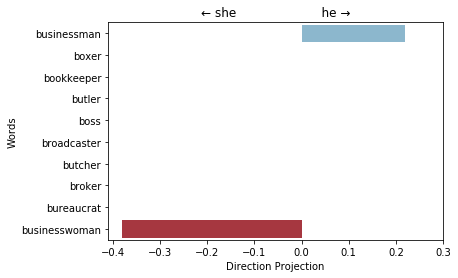

In [11]:
w2v_gender_bias_we.plot_projection_scores(sample_profession_name);

## Let's do the same for Facebook's FastText words embedding

In [12]:
fasttext_path = downloader.load('fasttext-wiki-news-subwords-300', return_path=True)
print(fasttext_path)
fasttext_model = KeyedVectors.load_word2vec_format(fasttext_path)

fasttext_gender_bias_we = GenderBiasWE(fasttext_model, only_lower=False, verbose=True)

/home/users/shlohod/gensim-data/fasttext-wiki-news-subwords-300/fasttext-wiki-news-subwords-300.gz
Identify direction using pca method...
  Principal Component    Explained Variance Ratio
---------------------  --------------------------
                    1                   0.531331
                    2                   0.18376
                    3                   0.089777
                    4                   0.0517856
                    5                   0.0407739
                    6                   0.0328988
                    7                   0.0223339
                    8                   0.0193495
                    9                   0.0143259
                   10                   0.0136648


In [13]:
fasttext_gender_bias_we.evaluate_words_embedding()

Evaluate word pairs...
Evaluate analogies...

From Gensim

------------------------------

Word Pairs Result - WordSimilarity-353:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Pearson correlation coefficient: (0.6064465441010313, 7.884629612673178e-37)
Spearman rank-order correlation coefficientbetween the similarities from the datasetand the similarities produced by the model itself: SpearmanrResult(correlation=0.5959362724389288, pvalue=2.5867291082202643e-35)
Ratio of pairs with unknown words: 0.0

------------------------------

Analogies Result
~~~~~~~~~~~~~~~~
Overall evaluation score: 0.8827876424099353


In [14]:
fasttext_gender_bias_we.calc_direct_bias()

0.07633256240142092

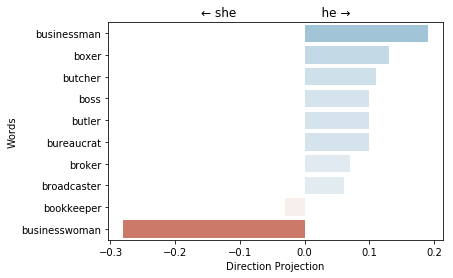

In [15]:
fasttext_gender_bias_we.plot_projection_scores(sample_profession_name);

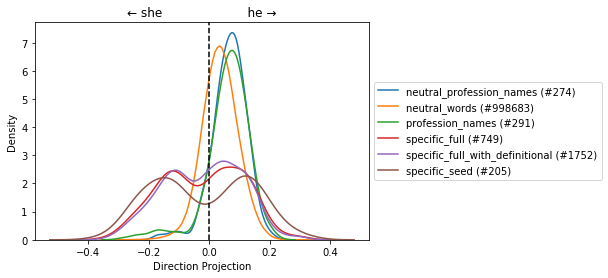

In [16]:
fasttext_gender_bias_we.plot_dist_projections_on_direction()

In [17]:
fasttext_gender_bias_we.debias('hard')

Neutralize...


100%|██████████| 998683/998683 [00:45<00:00, 22188.27it/s]


Equalize...


In [18]:
fasttext_gender_bias_we.evaluate_words_embedding()

Evaluate word pairs...
Evaluate analogies...

From Gensim

------------------------------

Word Pairs Result - WordSimilarity-353:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Pearson correlation coefficient: (0.6085795068154352, 3.821217955215411e-37)
Spearman rank-order correlation coefficientbetween the similarities from the datasetand the similarities produced by the model itself: SpearmanrResult(correlation=0.598081825041795, pvalue=1.2817937025363148e-35)
Ratio of pairs with unknown words: 0.0

------------------------------

Analogies Result
~~~~~~~~~~~~~~~~
Overall evaluation score: 0.8821718156625269


In [19]:
fasttext_gender_bias_we.calc_direct_bias()

1.4306556940946813e-09

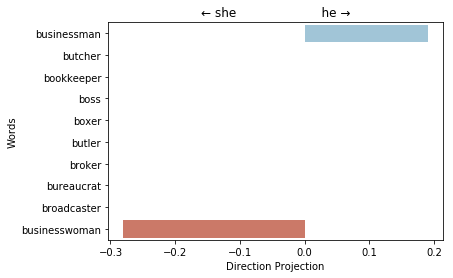

In [20]:
fasttext_gender_bias_we.plot_projection_scores(sample_profession_name);